In [146]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [147]:
df = pd.read_csv("../data/master_dataset.csv")

### Normalization

In [148]:
# Read X and y
X = df.drop('High', axis=1)
y_archive = df["High"]
y = df['High'] - df["Open"]
y = pd.DataFrame(y)

# Remove any non-numeric cols
numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]


In [149]:
# Remove high and close on current day
drop_mask = []

for col in X:
    if 'high' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)
    if 'low' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)

    if 'close' in str(col).lower():
        
        if 'lag' in str(col).lower():
            pass
        else:
            print(col)
            drop_mask.append(col)

# Drop elems in drop mask
X = X.drop(drop_mask, axis=1)
X.drop('Unnamed: 0', axis=1, inplace=True)

Low
Close
Adj Close
High_DXY
Low_DXY
Close_DXY
Adj Close_DXY
High_CHF
Low_CHF
High_BNO
Low_BNO
Close_BNO
Adj Close_BNO
High_GSCI
Low_GSCI
High_USL
Low_USL
Close_USL
Adj Close_USL


In [150]:

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3535, 38)
X_test shape: (884, 38)
y_train shape: (3535, 1)
y_test shape: (884, 1)


In [151]:
# Only fit the normalizers on the training data!
X_norm = MinMaxScaler().fit(X_train)
y_norm = MinMaxScaler().fit(y_train)

X_train_norm = X_norm.transform(X_train)
X_test_norm = X_norm.transform(X_test)

y_train_norm = y_norm.transform(y_train)
y_test_norm = y_norm.transform(y_test)

### Linear Regression

Coefficients: [[ 2.09377150e-01  4.67882893e-01 -6.52960609e-03  1.76819200e-02
   1.57934978e-02 -3.07152741e-02  9.94539439e-03  1.82788114e-04
   1.82788114e-04  4.42596378e-02  1.43430002e-01 -9.74808311e-02
  -3.33108377e-02 -8.73055303e-02  1.00874129e-01 -1.39807448e-02
  -3.82495056e-02 -6.67019010e-02  1.29894796e-02  7.00402519e-02
  -2.57739529e-02 -1.68024797e-02 -1.68024797e-02  1.93728764e-02
   2.72277273e+00 -2.75945781e+00  1.19786685e-02  5.21932942e-02
  -1.33512393e-02 -4.83482518e-02  1.11083501e-01 -1.48119093e-01
  -5.84973075e-02 -1.04744222e-01  7.47646292e-02 -2.78454338e-03
  -2.78454338e-03 -7.37569638e-02]]
Intercept: [0.02267458]
Mean Squared Error: 7.01351186275784 R^2: 0.4250235240182627


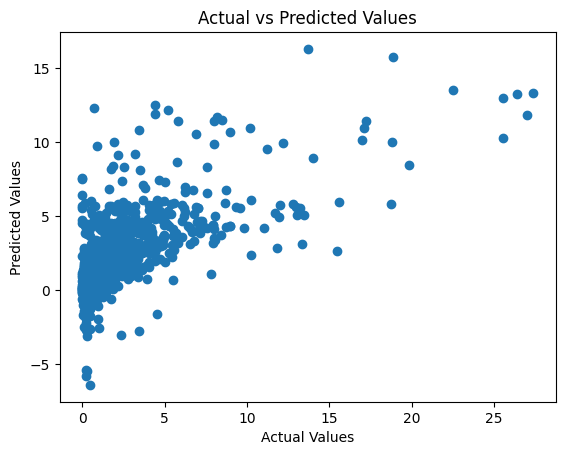

In [152]:
# Train a simple linear regression model to test efficacy
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train_norm)

# Make predictions on the test set
y_pred_norm = regressor.predict(X_test_norm)

# Inverse transform the scaled predictions to get the original scale
y_pred = y_norm.inverse_transform(y_pred_norm)

# Print the coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse, "R^2:", r2)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [154]:
comp = y_test.copy()
comp["y_pred"] = y_pred
comp["Comp"] = y_archive
comp["Pred_Comp"] = X_test["Open"] + comp["y_pred"]
comp["Open"] = X_test["Open"]
comp

,0,y_pred,Comp,Pred_Comp,Open
1042,7.599976,4.214907,276.799988,273.414919,269.200012
1272,3.599976,1.361126,362.079987,359.841137,358.480011
1918,0.800019,2.794697,271.040009,273.034687,270.239990
1896,0.640015,1.349874,290.480011,291.189870,289.839996
4066,2.349999,1.641129,89.559998,88.851128,87.209999
...,...,...,...,...,...
2833,0.720002,1.242515,76.400002,76.922515,75.680000
564,1.599976,6.842060,893.599976,898.842060,892.000000
1779,2.720001,1.869960,274.399994,273.549953,271.679993
4387,0.479995,1.995853,81.139999,82.655857,80.660004


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

c:\Users\vibkr\Desktop\Y2S1\Fin\USO_ETF_Day_Trading\uso_etf_venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 8.1268
R-squared: 0.3338


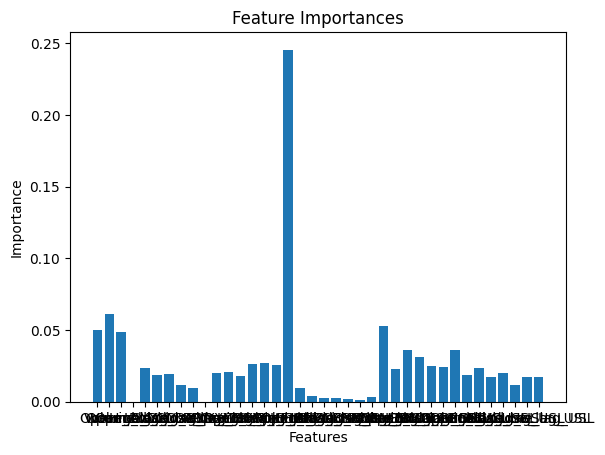

In [ ]:
# Plot feature importances
feature_importances = rf_regressor.feature_importances_
feature_names = [i for i in X.columns] 

plt.bar(feature_names, feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

<Axes: >

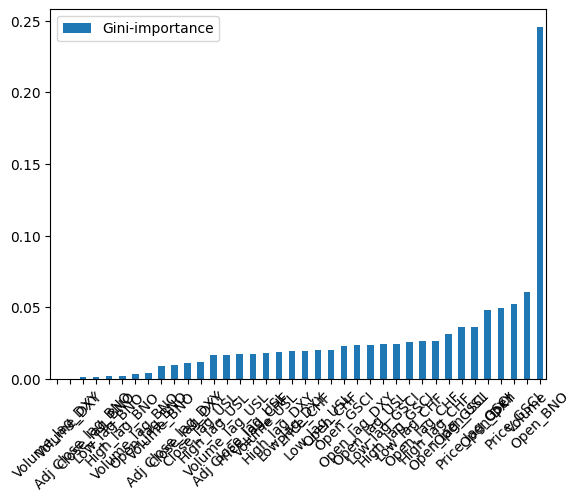

In [ ]:
feats = {}

for feature, importance in zip(X.columns, rf_regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
importances.sort_values('Gini-importance', ascending=False)

,Gini-importance
Open_BNO,2.456024e-01
Volume,6.088863e-02
Price_GSCI,5.245492e-02
Open,4.973795e-02
Open_DXY,4.842448e-02
Price_lag_GSCI,3.607000e-02
Open_USL,3.601266e-02
Open_lag_GSCI,3.107879e-02
High_lag_CHF,2.671359e-02
Open_lag_CHF,2.622826e-02


### XGBoost